In [7]:
# %load_ext autoreload
# % autoreload 2
from matplotlib import pyplot as plt
from matplotlib.figure import Figure
%matplotlib inline
import reinforcement_expm
import numpy as np
import tensorflow as tf
from agents import load_expm_params
import copy
from IPython.display import clear_output
import os
# from IPython.core.debugger import set_trace; set_trace()

def episode_finished_callback(runner,persistent_to_print = []):
    if runner.episodes % 1 == 0:
        clear_output(wait=True)
        for ptp in persistent_to_print:
            if isinstance(ptp,Figure):
                display(ptp)
            print(ptp)
        print('logging in %s:' % runner.log_dir)
        print('Average reward at episode %d : %d' % (runner.episodes,np.mean(runner.episode_rewards[-100:])))
        print('Avg sample time is %f (ms)' % (1000*runner.avg_sample_time))
        print('Avg train time is %f (ms)' % ((runner.global_trains/runner.global_t)*(1000*runner.avg_train_time)))
        
        if len(runner.current_episode_losses):
            plt.figure(figsize=[13,3])
        
            num_losses = np.shape(runner.episode_average_losses)[1]

            ax1 = plt.subplot2grid((1,num_losses+2), (0, 0), colspan=2)
            plt.plot(runner.episode_rewards)
            plt.xlabel('Episode')
            plt.ylabel('Rewards')
        
            for i in range(num_losses):
                ax = plt.subplot2grid((1,num_losses+2), (0, 2 + i))
                plt.plot(runner.episode_average_losses[:,i])
                plt.xlabel('Episode')
                plt.ylabel('Losses')
        plt.show()
        plt.close()
        
        
        
# reinforcement_expm.clear_logs() # Do some housekeeping

logging in /tmp/tensorflow/logs/reinforcement_learning/DQN_CartPole_20181102_091907:
Average reward at episode 370 : 89
Avg sample time is 0.553260 (ms)
Avg train time is 2.185215 (ms)


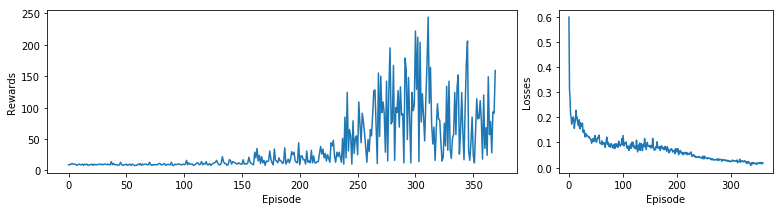

Finished experiment, logged in: /tmp/tensorflow/logs/reinforcement_learning/DQN_CartPole_20181102_091907


In [9]:
algorithm = 'DQN'
expm_name = 'CartPole'
runner = reinforcement_expm.run_expm(algorithm,expm_name,episode_finished_callback=episode_finished_callback)

In [10]:
# algorithm = 'PPO'
# expm_name = 'LunarLander'

# test_case_params = {
#     '1' : dict(agent_params = dict(max_td = 1)),
#     '3' : dict(agent_params = dict(max_td = 3)),
#     '10' : dict(agent_params = dict(max_td = 10)),
#     }

    
# rewards = reinforcement_expm.sweep_test_cases(algorithm,expm_name,test_case_params,runs_per_point = 3,episode_finished_callback=episode_finished_callback)

   